# Table of content:


*   Introduction

*  Problem Statement

*   Installing Dependencies

*   Importing necessary packages

*   Constansts 

*  Synthetic Data Generator

*    Create Model/Network

*   Train the model

*  Prediction Time

*   Save Model

*   Using Pretrained Model

*  Running Our Digit Recognizer





Refrences

https://keras.io/examples/image_ocr/

https://github.com/rossumai/OCkRE



# Introduction


The plan is to do ocr with a deep lerning model. This stage can be used after text detection stage in the full ocr pipeline. We will have crops detected with a tet recognition model and we will do ocr on these crops. The advantages of a deep learning model like this are we don't need character segmentation as we are using a loss function which can align the true labels and predicted labels and produce a loss value, so we just need to say that we expect this sequence as result and give ground truth text and use the model to produce a sequence which can be improved by our optimizer.

![title](imgs/crnn_block_diagram.png)



# Problem Statement

We will be predicting a sequnce of texts given a image with text with a keras model and it is going to be trained on words upto 32 length and it may work beyond that too but it will work well on texts with character length of less than or equal to 32.

# Installing Dependencies

We will be using google fonts to create synthetic images and for that we will clone their repository to colab environment or your local environment.

In [0]:
# !git clone -q https://github.com/google/fonts.git

fatal: destination path 'fonts' already exists and is not an empty directory.


In [0]:
# !ls fonts/apache/

# Importing necessary packages

In [0]:


from __future__ import print_function
from __future__ import absolute_import
from __future__ import division

import itertools
import os
import re
from multiprocessing import Pool
import editdistance
import keras.callbacks
import numpy as np
from keras import backend as K
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Input, Dense, Conv2D, BatchNormalization, Activation
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger
from keras.layers import Reshape, Lambda, merge, RepeatVector, concatenate
from keras.layers import MaxPooling2D, AveragePooling2D, Input, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing import image
from keras.datasets import cifar10
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras import backend as K
from keras.models import Model
from scipy import ndimage
import numpy as np
import keras
import os
import tensorflow as tf

from keras.layers.recurrent import GRU
from keras.layers.wrappers import Bidirectional
from keras.models import Model
from keras.preprocessing import image
from scipy import ndimage

import argparse
import os
import sys
import numpy as np
import keras
import json
import cv2

from shutil import copyfile
import sys
from random import choice as oldchoice
from random import randint as randint
import traceback
import itertools
from collections import defaultdict

import numpy as np
import keras
import json


import json
import random

import keras
from multiprocessing import Pool
import editdistance
import matplotlib.pyplot as plt
import random
from itertools import permutations



from shutil import copyfile
import sys
from random import choice as oldchoice
from random import randint as randint
import traceback
import itertools
from collections import defaultdict

from PIL import Image, ImageDraw, ImageFont
from PIL import PngImagePlugin
import numpy as np
from sklearn.utils import check_random_state
# import cairocffi as cairo
from scipy import ndimage

from scipy.ndimage.filters import gaussian_filter
from numpy import *
import random
import codecs
import json
import glob
from PIL import Image, ImageColor, ImageFont, ImageDraw, ImageFilter
import imgaug.augmenters as iaa
import unicodedata
import math
import os
import random
import numpy as np



# Constansts

We have many contant parameters, which can be used to change the model check pointing location , the fonts we use and even the characters our model can predict.

In [0]:

fonts = glob.glob('./fonts/apache/*/*.ttf')


OUTPUT_DIR = './'
data_dict = {
          "fonts":["Century Schoolbook", "Courier", "STIX", "FreeMono", "Anonymous Pro Font Family", "Adamina Font", "Aleo Font Family", "Cutive Font","Habibi", "Kameron Font Family", "Nimbus Mono", "Comme ExtraLight", "Gruppo", "MathJax_Main", "MathJax_Typewriter", "cmr10", "URW Palladio L", "Bitstream Vera Sans", "Bitstream Vera Sans Mono", "URW Gothic L","URW Chancery L", "Bitstream Vera Serif", "Nimbus Sans L", "Standard Symbols L", "MathJax_SansSerif", "Nimbus Mono L", "URW Bookman L"],
          "data_types":["account_num","amount_due","amount_paid","amount_rounding","amount_total","bank_num", "bic",
              "const_sym","customer_id","date_due","date_issue","date_uzp","iban","invoice_id",
              "order_id","phone_num","recipient_dic","recipient_ic","sender_dic","sender_ic","spec_sym","var_sym"],
          "alphabet":'''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'',.<>[]{};:~!#@$%&*()-_+=""~``^|\\/ ''',
          "noises":[]
          }


# with open('config.json') as config_file:
#     data = json.load(config_file)

# with open('config.json') as config_file:
    # data = json.load(config_file)
data_dict = {
          "fonts":["Century Schoolbook", "Courier", "STIX", "FreeMono", "Anonymous Pro Font Family", "Adamina Font", "Aleo Font Family", "Cutive Font","Habibi", "Kameron Font Family", "Nimbus Mono", "Comme ExtraLight", "Gruppo", "MathJax_Main", "MathJax_Typewriter", "cmr10", "URW Palladio L", "Bitstream Vera Sans", "Bitstream Vera Sans Mono", "URW Gothic L","URW Chancery L", "Bitstream Vera Serif", "Nimbus Sans L", "Standard Symbols L", "MathJax_SansSerif", "Nimbus Mono L", "URW Bookman L"],
          "data_types":["account_num","amount_due","amount_paid","amount_rounding","amount_total","bank_num", "bic",
              "const_sym","customer_id","date_due","date_issue","date_uzp","iban","invoice_id",
              "order_id","phone_num","recipient_dic","recipient_ic","sender_dic","sender_ic","spec_sym","var_sym"],
          "alphabet":'''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'',.<>[]{};:~!#@$%&*()-_+=""~``^|\\/''',
          "noises":[]
          }

text_color = '#282828'
height = 32
width = -1
orientation = 0
space_width = 1
fit = True
margings = (5, 5, 5, 5)
alignment = 0
out_dir = './'
background_type = 0
image_name = 'test_textgenerator.jpg'
margin_top, margin_left, margin_bottom, margin_right = margings
horizontal_margin = margin_left + margin_right
vertical_margin = margin_top + margin_bottom

In [0]:
# fonts

# Synthetic image geerator

The below functions create an image given a font and text. We use a white background and a guassian background. PIL is the libraray used.

In [0]:


def gaussian_noise(height, width):
    """
        Create a background with Gaussian noise (to mimic paper)
    """

    # We create an all white image
    image = np.ones((height, width)) * 255

    # We add gaussian noise
    cv2.randn(image, 235, 10)

    return Image.fromarray(image).convert('RGBA')

def plain_white(height, width):
    """
        Create a plain white background
    """

    return Image.new("L", (width, height), 255).convert('RGBA')
  



# paints the string in a random location the bounding box
# also uses a random font, a slight random rotation,
# and a random amount of speckle noise

margins=(5, 5, 5, 5)
space_width=1.0
text_color='#282828'
import random

from PIL import Image, ImageColor, ImageFont, ImageDraw, ImageFilter

def generate(text, font, text_color, font_size, orientation, space_width, fit):
    '''
    A function to generate a image with the text pasted on it.
    '''
    if orientation == 0:
        return _generate_horizontal_text(text, font, text_color, font_size, space_width, fit)
    elif orientation == 1:
        return _generate_vertical_text(text, font, text_color, font_size, space_width, fit)
    else:
        raise ValueError("Unknown orientation " + str(orientation))

def _generate_horizontal_text(text, font, text_color, font_size, space_width, fit):
    '''
    To generate an image with text in horizontal orientation.
    '''
    # setting the font
    image_font = ImageFont.truetype(font=font, size=font_size)
    # split the string into words
    words = text.split(' ')
    # get the width nad height of the image
    space_width = image_font.getsize(' ')[0] * space_width

    words_width = [image_font.getsize(w)[0] for w in words]
    text_width =  sum(words_width) + int(space_width) * (len(words) - 1)
    text_height = max([image_font.getsize(w)[1] for w in words])
    # create a blank image with the correct diamentions
    txt_img = Image.new('RGBA', (text_width, text_height), (0, 0, 0, 0))
    # Add the text to the image
    txt_draw = ImageDraw.Draw(txt_img)

    colors = [ImageColor.getrgb(c) for c in text_color.split(',')]
    c1, c2 = colors[0], colors[-1]

    fill = (
        random.randint(min(c1[0], c2[0]), max(c1[0], c2[0])),
        random.randint(min(c1[1], c2[1]), max(c1[1], c2[1])),
        random.randint(min(c1[2], c2[2]), max(c1[2], c2[2]))
    )

    for i, w in enumerate(words):
        txt_draw.text((sum(words_width[0:i]) + i * int(space_width), 0), w, fill=fill, font=image_font)

    if fit:
        return txt_img.crop(txt_img.getbbox())
    else:
        return txt_img

def _generate_vertical_text(text, font, text_color, font_size, space_width, fit):
    image_font = ImageFont.truetype(font=font, size=font_size)
    
    space_height = int(image_font.getsize(' ')[1] * space_width)

    char_heights = [image_font.getsize(c)[1] if c != ' ' else space_height for c in text]
    text_width = max([image_font.getsize(c)[0] for c in text])
    text_height = sum(char_heights)

    txt_img = Image.new('RGBA', (text_width, text_height), (0, 0, 0, 0))

    txt_draw = ImageDraw.Draw(txt_img)

    colors = [ImageColor.getrgb(c) for c in text_color.split(',')]
    c1, c2 = colors[0], colors[-1]

    fill = (
        random.randint(c1[0], c2[0]),
        random.randint(c1[1], c2[1]),
        random.randint(c1[2], c2[2])
    )

    for i, c in enumerate(text):
        txt_draw.text((0, sum(char_heights[0:i])), c, fill=fill, font=image_font)

    if fit:
        return txt_img.crop(txt_img.getbbox())
    else:
        return txt_img

def paint_text(text, w, h, font, rotate=False, ud=False, multi_fonts=False, space_width=1.0,text_color='#282828'):
    ''' 
    takes a text and put that on to an image
    '''
    # select the font size randomly
    font_size = np.random.randint(15, 25)
   
    height = h
    # if the font is a list take a font from it randomly or use the font supplied to the fucntion
    if isinstance(font, list):
       font = np.random.choice(font)
    image = generate(text, font, text_color,
                             height, 0, space_width, fit)
    # resize the image to our specifications
    new_width = int(image.size[0] * (float(height - vertical_margin) / float(image.size[1])))
    resized_img = image.resize((new_width, height - vertical_margin), Image.ANTIALIAS)
    background_width = width if width > 0 else new_width + horizontal_margin
    background_height = height

    # select the guassian background most of the time and sometimes plain background
    if random.random() < 0.8:
        background = gaussian_noise(background_height, w)
    else:
        background = plain_white(background_height, w)

    #############################
    # Place text with alignment #
    #############################
    # paste the text onto the background
    new_text_width, _ = resized_img.size

    if alignment == 0 or width == -1:
        background.paste(resized_img, (margin_left, margin_top), resized_img)

    background = np.array(background.convert('L')) # when applying inhouse noise.astype(np.float32) / 255
    # return the image
    return background

# Synthetic Data Generator

Now we need to create fake strings to train our model and we use functions from this repo https://github.com/rossumai/OCkRE/blob/master/fakestrings.py Here we are creating fake string like bank account, amount, unique codes etc.

We have functions that will generate the necessary type of data randomly and we use randomstring(**) function to get the random string which will select each type of data randomly and return it. We can use this to generate our training text data which we will pass to the paint_text(*) function to get the iamge with the text.

In [0]:





#simple weighted choice implementation from https://stackoverflow.com/questions/3679694/a-weighted-version-of-random-choice
def weighted_choice(choices):
   total = sum(w for c, w in choices)
   r = random.uniform(0, total)
   upto = 0
   for c, w in choices:
      if upto + w >= r:
         return c
      upto += w
   assert False, "Shouldn't get here"


def ICO():
    ico = ""
    weight = 8
    weight_sum = 0
    while len(ico) < 7:
        num = random.randint(0, 9)
        ico = ico + str(num)
        weight_sum = weight_sum + weight * num
        weight -= 1
    last_num = (11 - (weight_sum % 11)) % 10
    ico = ico + str(last_num)
    # dic = "CZ" + ico
    return ico


def DIC():
    dic = "CZ" + ICO()
    return dic


def phone_num():
    type = weighted_choice([(1, 0.4), (2, 0.3), (3, 0.1), (4, 0.2)])
    stuffs = []
    for i in range(0, 9):
        stuffs.append(random.randint(0, 9))
    if type is 1:
        return "+420 %d%d%d %d%d%d %d%d%d" % tuple(stuffs)
    if type is 2:
        return "+420-%d%d%d%d%d%d%d%d%d" % tuple(stuffs)
    if type is 3:
        return "+420%d%d%d%d%d%d%d%d%d" % tuple(stuffs)
    if type is 4:
        return "%d%d%d%d%d%d%d%d%d" % tuple(stuffs)


def data():
    month = random.randint(1, 12)
    long_month = "1,3,5,7,8,10,12,"
    if (str(month) + ",") in long_month:
        day = random.randint(1, 31)
    else:
        if month == 2:
            day = random.randint(1, 29)
        else:
            day = random.randint(1, 30)
    year = random.randint(1980, 2020)
    type = weighted_choice([(1,0.4),(2,0.4),(3,0.2)])
    if type is 1:
        date = str(day) + "." + str(month) + "." + str(year)
    if type is 2:
        date = str(day) + ". " + str(month) + ". " + str(year)
    if type is 3:
        date = str(day) + "-" + str(month) + "-" + str(year)
    return date


def account_num():
    prefix = ""
    while len(prefix) < 6:
        num = random.randint(0, 9)
        prefix = prefix + str(num)
    main_num = ""
    while len(main_num) < 10:
        num = random.randint(0, 9)
        main_num = main_num + str(num)
    i = random.randint(0, 1)
    if (i == 0):
        account = prefix + "-" + main_num
    if (i == 1):
        account = main_num
    # account = main_num + "/" + bank_code
    return account


def bank_num():
    bank_list = ['0100', '0300', '0600', '0710', '0730', '0800', '2010', '2020', '2030', '2040', '2050', '2060', '2070', '2100', '2200', '2210', '2220', '2230',
                 '2240', '2250', '2310', '2600', '2700', '3030', '3500', '4000', '4300', '5000', '5400', '5500', '5800', '6000', '6100', '6200', '6210', '6300',
                 '6700', '6800', '7910', '7940', '7950', '7960', '7970', '7980', '7990', '8030', '8040', '8060', '8090', '8150', '8200', '9870', '9890', '9910',
                 '9960', '9980']
    bank_code = bank_list[random.randint(0, len(bank_list) - 1)]
    return bank_code


def IBAN():
    account = account_num()
    code_bank = account[len(account) - 4:]
    main = account[:len(account) - 5]
    main = main.replace("-", "")
    num_1 = str(random.randint(0, 9))
    num_2 = str(random.randint(0, 9))
    iban = "CZ" + num_1 + num_2 + code_bank + "0000" + main
    return iban


def const_symbol():
    # use to generate specific sym., constant sym.
    sym = ""
    i = random.randint(1, 4)
    while len(sym) < i:
        num = random.randint(0, 9)
        sym = sym + str(num)
    return sym


def var_symbol():
    # use to generate specific sym., constant sym.
    sym = ""
    i = random.randint(1, 10)
    while len(sym) < i:
        num = random.randint(0, 9)
        sym = sym + str(num)
    return sym


def amount():
    thousand_sep, dec_sep = random.choice([(' ',','),('',','),('.',','),(' ','.')])
    length = random.randint(1,7)
    amount = []
    
    if random.randint(0,10):
        if random.randint(0,1):
            if random.randint(0,5):
                amount.append('00')
            else:
                amount.append('-')
                dec_sep = ','
        else:
            amount.append(str(random.randint(0,9)))
            amount.append(str(random.randint(0,9)))
        amount.append(dec_sep)
    else:
        thousand_sep = ''
    
    if length == 1:
        if random.randint(0,1):
            amount.append('0')
            return ''.join(reversed(amount))
              
    for i in range(length):
        if i == length -1:
            amount.append(str(random.randint(1,9)))
            break
        else:
            amount.append(str(random.randint(0,9)))
        if (i+1) % 3 == 0:
            amount.append(thousand_sep)
    return ''.join(reversed(amount))
    
    
def invoice_id():
    large = random.randint(1, 9)
    invid = ""
    while len(invid) < large:
        num = random.randint(0, 9)
        invid = invid + str(num)
    return invid 


def swift_code():
    bic_list = ['KOMBCZPP', 'CEKOCZPP', 'AGBACZPP', 'CNBACZPP', 'GIBACZPX', 'FIOBCZPP', 'BOTKCZPP', 'CITFCZPP', 'MPUBCZPP', 'FICHCZPP', 'ARTTCZPP', 'POBNCZPP',
                'CTASCZ22', 'ZUNOCZPP', 'CITICZPX', 'BACXCZPP', 'AIRACZPP', 'INGBCZPP', 'SOLACZPP', 'CMZRCZP1', 'ABNACZPP', 'RZBCCZPP', 'JTBPCZPP', 'PMBPCZPP',
                'EQBKCZPP', 'COBACZPX', 'BREXCZPP', 'GEBACZPP', 'SUBACZPP', 'VBOECZ2X', 'DEUTCZPX', 'SPWTCZ21', 'GENOCZ21', 'OBKLCZ2X', 'CZEECZPP', 'MIDLCZPP']
    num = random.randint(0, len(bic_list) - 1)
    return bic_list[num]


def randomstring(wantedlabels=data_dict['data_types']):
    if wantedlabels is None:
        wantedlabels = ['account_num','amount_due','amount_paid','amount_rounding','amount_total','bank_num', 'bic',
             'const_sym','customer_id','date_due','date_issue','date_uzp','iban','invoice_id',
             'order_id','phone_num','recipient_dic','recipient_ic','sender_dic','sender_ic','spec_sym','var_sym']
    lab = random.choice(wantedlabels)
    if lab is 'ico' or lab is 'sender_ic' or lab is 'recipient_ic':
        return ICO() , lab
    if lab is 'dic' or lab is 'sender_dic' or lab is 'recipient_dic':
        return DIC() , lab
    if lab is 'phone_num':
        return phone_num() , lab
    if lab is 'bic':
        return swift_code() , lab
    if lab is 'data' or lab is 'date_due' or lab is 'date_issue' or lab is 'date_uzp':
        return data() , lab
    if lab is 'account_num':
        return account_num() , lab
    if lab is 'bank_num':
        return bank_num() , lab
    if lab is 'iban':
        return IBAN() , lab
    if lab is 'const_sym' or lab is 'customer_id' or lab is 'order_id' or lab is 'spec_sym':
        return const_symbol() , lab
    if lab is 'var_sym':
        return var_symbol() , lab
    if lab is 'amount' or lab is 'amount_rounding' or lab is 'amount_due' or lab is 'amount_total' or lab is 'amount_paid':
        return amount() , lab
    if lab is 'invoice_id':
        return invoice_id() , lab
    else:
        raise ValueError("No such label: %s" % lab)



# Utils functions

Function to preprocess, convert text to code and code to text

In [0]:

def deaccent(unistr):
    # http://www.abclinuxu.cz/clanky/programovani/standardni-knihovna-pro-python-7-retezce-3
    return "".join(aChar
                   for aChar in unicodedata.normalize("NFD", unistr)
                   if not unicodedata.combining(aChar))

def set_min_max(image,normalised_min=0,normalised_max=1,ignore_zero=False):
    '''
    image normaization
    '''
    optimal_image=image
#     print(np.unique(optimal_image))
    if ignore_zero==True:
        unique=np.unique(optimal_image)
        if unique[0]==0:
            min_value=unique[1]
        else:
            min_value=unique[0]
    else:
        min_value=np.min(optimal_image)
    max_value=np.max(optimal_image)
    if min_value!=max_value:
        optimal_image = (optimal_image - min_value) / (max_value-min_value)
        optimal_image = optimal_image * (normalised_max - normalised_min) + normalised_min
    return optimal_image


# Translation of characters to unique integer values
def text_to_labels(text):
    ret = []
    for char in text:
        decoded_char = data_dict['alphabet'].find(char)
        if decoded_char == -1:
           #print(f"{char} is not in alphabet")
           ret.append(len(data_dict["alphabet"])-1)
        else:
           ret.append(decoded_char)
    return ret


# Reverse translation of numerical classes back to characters
def labels_to_text(labels):
    ret = []
    for c in labels:
        if c >= len(data_dict['alphabet']):  # CTC Blank
            ret.append("")
        else:
            ret.append(data_dict['alphabet'][c])
    return "".join(ret)

# For a real OCR application, this should be beam search with a dictionary
# and language model.  For this example, best path is sufficient.

def decode_batch(ocr_prediction, word_batch, debug=False):
    out = ocr_prediction([word_batch])[0]
    ret = []
    for j in range(out.shape[0]):
        out_best = list(np.argmax(out[j, 2:], 1))
        out_best = [k for k, g in itertools.groupby(out_best)]
        outstr = labels_to_text(out_best)
        ret.append(outstr)
    if debug:
        return ret, out
    return ret


# only a-z and space..probably not to difficult
# to expand to uppercase and symbols

def is_valid_str(in_str):
    # search = re.compile(r'[^a-z\ ]').search
    # return not bool(search(in_str))
    return True


# the actual loss calc occurs here despite it not being
# an internal Keras loss function

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)



# Keras visualization callback

This custom callback will print out mean edit distance and absolute accuracy of our model during training. This will also plot some sample images and teir OCR results.

In [0]:

class VizCallback(keras.callbacks.Callback):
    def __init__(self, run_name, ocr_prediction, text_img_gen, output_dir, model, val_words):
        self.ocr_prediction = ocr_prediction
        self.val_words = val_words
        self.output_dir = os.path.join(
            output_dir, run_name)
        self.text_img_gen = text_img_gen
        self.model = model
        if not os.path.exists(self.output_dir):
            os.makedirs(self.output_dir)

    def show_edit_distance(self, num):
        num_left = num
        mean_norm_ed = 0.0
        mean_ed = 0.0
        wrong = 0
        right = 0
        while num_left > 0:
            word_batch = next(self.text_img_gen)[0]
            num_proc = min(word_batch['the_input'].shape[0], num_left)
            decoded_res = decode_batch(self.ocr_prediction, word_batch['the_input'][0:num_proc])
            for j in range(0, num_proc):
                ocr_result = decoded_res[j] # deaccent(unicode(re.sub("[\+\/]", "", re.sub("\\s", "", decoded_res[j])), 'utf-8'))
                #print(f'  accessing {j} th position in a list with length {len(word_batch["source_str"])}')
                gold_label = word_batch['source_str'][j] # re.sub("[\+\/]", "", re.sub("\\s", "", word_batch['source_str'][j]))
                if gold_label == ocr_result:
                    right += 1
                else:
                    wrong += 1
                edit_dist = editdistance.eval(decoded_res[j], word_batch['source_str'][j])
                mean_ed += float(edit_dist)
                mean_norm_ed += float(edit_dist) / len(word_batch['source_str'][j])
            num_left -= num_proc
        absacc = float(right) / (float(right) + float(wrong))
        mean_norm_ed = mean_norm_ed / num
        mean_ed = mean_ed / num
        outline = ' Out of %d samples:  Mean edit distance: %.3f Mean normalized edit distance: %0.3f\n Absolute accuracy over labels is %0.2f\n' % (
            num, mean_ed, mean_norm_ed, absacc)
        print(outline)

        return mean_norm_ed, absacc, word_batch, decoded_res
    def vis_results(self, images, word_batch,res,epoch,num_display_words=6):
        cols = 2
        for i in range(num_display_words):
            plt.subplot(num_display_words // cols, cols, i + 1)
            the_input = images[i]
            # print(f'image_shape is {the_input.shape}')
            plt.imshow(the_input[:,:,0].T, cmap='Greys_r')
            plt.xlabel('Truth = \'%s\'\nDecoded = \'%s\'' % (word_batch[i], res[i]))
        fig = plt.gcf()
        fig.set_size_inches(20, 13)
        plt.savefig(os.path.join(self.output_dir, 'epoch_%02d.png' % (epoch)))
        plt.show()
        plt.close()

    def on_epoch_end(self, epoch, logs={}):
        weight_file = os.path.join(self.output_dir, 'weights%02d.h5' % (epoch))
        self.model.save_weights(weight_file)
        print(f'model saved at {weight_file}')
        mean_norm_ed, absacc, word_batch, decoded_res = self.show_edit_distance(self.val_words)
        # print(f"length of decoded results is {len(decoded_res)} and length of batch data is {len(word_batch['source_str'])}")
        self.vis_results( word_batch['the_input'], word_batch['source_str'],decoded_res,epoch,num_display_words=min(6,len(decoded_res)))
        logs["mean_norm_ed"] = mean_norm_ed
        logs["crop_accuracy"] = absacc



# Data Generator

In [0]:


#  The main internal dataset batch handler, built on top of the external cropset iterator.
class DataGenerator(keras.callbacks.Callback):
    def __init__(self, minibatch_size, img_w, img_h, noise_seq, data_dict=data_dict, absolute_max_string_len=32):
        self.minibatch_size = minibatch_size
        self.img_w = img_w
        self.img_h = img_h
        self.absolute_max_string_len = absolute_max_string_len
        self.data_dict = data_dict
        self.out_dim = len(self.data_dict['alphabet']) + 2
        self.blank_label = self.out_dim - 1
        self.batch_num = 0
        self.noise_seq = noise_seq

    def on_epoch_begin(self, fake1, fake2):
        pass

    def on_epoch_end(self, fake1, fake2):
        self.batch_num = 0;

    def __enter__(self):
        self.pool = Pool(processes=1, maxtasksperchild=30)
        return self

    def __exit__(self, type, value, trace):
        self.pool.close()
        self.pool.join()

    def next_train(self):
        while 1:
            yield self.get_batch(self.minibatch_size, train=True)

    def next_val(self):
        while 1:
            yield self.get_batch(self.minibatch_size, train=False)

    def get_batch(self, size, train):

        x_data = np.ones([size, self.img_w, self.img_h, 1])

        labels = np.ones([size, self.absolute_max_string_len])
        input_lengths = np.zeros([size, 1])
        label_lengths = np.zeros([size, 1])
        source_strs = []
        if train:
            trstr = "TRAIN"
        else:
            trstr = "VAL"
        self.batch_num += 1
        # generate images for training
        for i in range(size):
            # creating the blanl label vector which we will fill with correct labels 
            label = [-1] * self.absolute_max_string_len
            # get the random string
            rand_str, _ = randomstring()
            # select a random font from list
            font     = random.choice(fonts)
            # create image with text
            img = paint_text(rand_str, self.img_w, self.img_h,font) 
            # add the image to batch after transposing
            x_data[i, :, :, 0] = np.array(img).T
            # rand_str to label
            labels[i,0:len(rand_str)] = text_to_labels(rand_str)
            # input length and label length
            input_lengths[i] = self.img_w
            label_lengths[i] = len(rand_str)
            source_strs.append(rand_str)
          

        # apply data augmentation and noise_seq
        x_data = self.noise_seq.augment_images(x_data)
        x_data = np.array([set_min_max(image_,-1,1) for image_ in x_data ])
        inputs = {'the_input': x_data,
                  'the_labels': labels,
                  'input_length': input_lengths,
                  'label_length': label_lengths,
                  'source_str': source_strs,  # used for visualization only
                  }
        outputs = {'ctc': np.zeros([size])}  # dummy data for dummy loss function
        return (inputs, outputs)




# Create Model/Network

In [0]:
# Optical Character Recognition Engine in Keras
class OCR_MODEL:
    def __init__(self, data, img_w=512, img_h=64,batch_size=64, out_dim=95, verbose=1,output_dir='./'):
        self.verbose = verbose

        # Input Parameters
        self.img_h = img_h

        # Network parameters
        self.conv_num_filters = 16
        self.filter_size = 3
        self.pool_size = 1
        self.time_dense_size = 32
        self.rnn_size = 512
        self.absolute_max_string_len = 32
        self.img_w = img_w
        self.out_dim = out_dim
        self.minibatch_size = batch_size
        self.data = data
        self.output_dir = output_dir
        if K.image_dim_ordering() == 'th':
            input_shape = (1, self.img_w, self.img_h)
        else:
            input_shape = (self.img_w, self.img_h, 1)

        act = 'relu'
        input_data = Input(name='the_input', shape=input_shape, dtype='float32')
        inner = Convolution2D(self.conv_num_filters, self.filter_size, self.filter_size, border_mode='same',
                              activation=act, init='he_normal', name='conv1')(input_data)
        inner = MaxPooling2D(pool_size=(self.pool_size, self.pool_size), name='max1')(inner)
        inner = Convolution2D(self.conv_num_filters, self.filter_size, self.filter_size, border_mode='same',
                              activation=act, init='he_normal', name='conv2')(inner)
        inner = MaxPooling2D(pool_size=(self.pool_size, self.pool_size), name='max2')(inner)

        conv_to_rnn_dims = (self.img_w // (self.pool_size ** 2), (self.img_h // (self.pool_size ** 2)) * self.conv_num_filters)
        inner = Reshape(target_shape=conv_to_rnn_dims, name='reshape')(inner)

        # cuts down input size going into RNN:
        inner = Dense(self.time_dense_size, activation=act, name='dense1')(inner)

        # Two layers of bidirecitonal GRUs
        # GRU seems to work as well, if not better than LSTM:
        gru_1 = Bidirectional(GRU(self.rnn_size, return_sequences=True, init='he_normal', name='gru1'), merge_mode='sum')(inner)
        gru_2 = Bidirectional(GRU(self.rnn_size, return_sequences=True, init='he_normal', name='gru2'), merge_mode='concat')(gru_1)

        # transforms RNN output to character activations:
        inner = Dense(self.out_dim, init='he_normal', name='dense2')(gru_2)
        y_pred = Activation('softmax', name='softmax')(inner)

        if self.verbose != 0:
            Model(input=[input_data], output=y_pred).summary()
        outmod = Model(input=[input_data], output=y_pred)

        labels = Input(name='the_labels', shape=[self.absolute_max_string_len], dtype='float32')
        input_length = Input(name='input_length', shape=[1], dtype='int64')
        label_length = Input(name='label_length', shape=[1], dtype='int64')
        # Keras doesn't currently support loss funcs with extra parameters
        # so CTC loss is implemented in a lambda layer
        loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])

        # clipnorm seems to speeds up convergence
        # sgd = SGD(lr=0.02, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=5)

        self.model = Model(input=[input_data, labels, input_length, label_length], output=[loss_out])

        self.ocr_prediction = K.function([input_data], [y_pred])

    def loadweights(self, weightsfile='densified_labeltype_best.h5'):
        if weightsfile:
            self.model.load_weights(weightsfile)

    def train(self, noise_seq, start_epoch, stop_epoch, run_name='pil_run', verbose=1, epochlen=2048, vallen=2000):
        words_per_epoch = epochlen
        #val_words = len(val_crop_iter)
        val_words = vallen
        img_gen = DataGenerator(minibatch_size=self.minibatch_size, img_w=self.img_w, img_h=self.img_h,
                                noise_seq=noise_seq, data_dict=self.data,
                                absolute_max_string_len=self.absolute_max_string_len,
                                )
        # if vallen:
        #     val_words = vallen

        adam = keras.optimizers.Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

        output_dir = os.path.join(self.output_dir, run_name)

        # the loss calc occurs elsewhere, so use a dummy lambda func for the loss
        self.model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=adam)
        if start_epoch > 0:
            weight_file = os.path.join(output_dir, 'weights%02d.h5' % (start_epoch - 1))
            self.model.load_weights(weight_file)

        viz_cb = VizCallback(run_name, self.ocr_prediction, img_gen.next_val(), self.output_dir,self.model, val_words)

        weights_best_fname = os.path.join(output_dir, '%s-weights-best_loss.h5' % run_name)
        weights_best_fnamev = os.path.join(output_dir, '%s-weights-best_val_loss.h5' % run_name)
        weights_best_fnamemned = os.path.join(output_dir, '%s-weights-best_mned.h5' % run_name)
        weights_best_cro_accu = os.path.join(output_dir, '%s-weights-best_crop_accu.h5' % run_name)

        csv_logger = CSVLogger(os.path.join(output_dir, '%s.training.log' % run_name))

        checkpointer_loss = ModelCheckpoint(weights_best_fname, monitor='loss', save_best_only=True, save_weights_only=False, mode='min')
        checkpointer_vloss = ModelCheckpoint(weights_best_fnamev, monitor='val_loss', save_best_only=True, save_weights_only=False, mode='min')
        checkpointer_mned = ModelCheckpoint(weights_best_fnamemned, monitor='mean_norm_ed', save_best_only=True, save_weights_only=False, mode='min')
        checkpointer_accu = ModelCheckpoint(weights_best_cro_accu, monitor='crop_accuracy', save_best_only=True, save_weights_only=False, mode='max')

        self.model.fit_generator(generator=img_gen.next_train(), steps_per_epoch=words_per_epoch,
                                epochs=stop_epoch, validation_data=img_gen.next_val(), validation_steps=val_words,
                                callbacks=[viz_cb, img_gen, checkpointer_loss, checkpointer_vloss, checkpointer_mned, checkpointer_accu, csv_logger],
                                initial_epoch=start_epoch, verbose=verbose,max_queue_size=25,
                                workers=3, use_multiprocessing=True)

    def ocr_frompic(self, image, labeltype='amount', debug=False):
        pass

# Model Explanation


![Model Architecture](imgs/crnn.png)
[An End-to-End Trainable Neural Network for Image-based Sequence
Recognition and Its Application to Scene Text Recognition](https://arxiv.org/pdf/1507.05717.pdf)

### Network Architecture
At the bottom of CRNN, the convolutional layers automatically extract a feature sequence from each input image.
On top of the convolutional network, a recurrent network
is built for making prediction for each frame of the feature
sequence, outputted by the convolutional layers. The transcription layer at the top of CRNN is adopted to translate the
per-frame predictions by the recurrent layers into a label sequence. Though CRNN is composed of different kinds of
network architectures (eg. CNN and RNN), it can be jointly
trained with one loss function.

### Feature Sequence Extraction
![Feature Extraction](imgs/receptive_field_des.png)
In CRNN model, the component of convolutional layers
is constructed by taking the convolutional and max-pooling
layers from a standard CNN model (fully-connected layers
are removed). Such component is used to extract a sequential feature representation from an input image. Before being fed into the network, all the images need to be scaled
to the same height. Then a sequence of feature vectors is
extracted from the feature maps produced by the component of convolutional layers, which is the input for the recurrent layers. Specifically, each feature vector of a feature
sequence is generated from left to right on the feature maps
by column. This means the i-th feature vector is the concatenation of the i-th columns of all the maps. The width of
each column in our settings is fixed to single pixel.
As the layers of convolution, max-pooling, and elementwise activation function operate on local regions, they are
translation invariant. Therefore, each column of the feature
maps corresponds to a rectangle region of the original im-
age (termed the receptive field), and such rectangle regions
are in the same order to their corresponding columns on the
feature maps from left to right. As illustrated in Fig. 2, each
vector in the feature sequence is associated with a receptive
field, and can be considered as the image descriptor for that
region.

### Sequence Labeling
A deep bidirectional Recurrent Neural Network is built
on the top of the convolutional layers, as the recurrent layers. The recurrent layers predict a label distribution yt for
each frame xt in the feature sequence x = x1, . . . , xT . The
advantages of the recurrent layers are three-fold. Firstly,
RNN has a strong capability of capturing contextual information within a sequence. Using contextual cues for
image-based sequence recognition is more stable and helpful than treating each symbol independently. Taking scene
text recognition as an example, wide characters may require several successive frames to fully describe (refer to
Fig. 2). Besides, some ambiguous characters are easier to
distinguish when observing their contexts, e.g. it is easier to
recognize “il” by contrasting the character heights than by
recognizing each of them separately. Secondly, RNN can
back-propagates error differentials to its input, i.e. the convolutional layer, allowing us to jointly train the recurrent
layers and the convolutional layers in a unified network.Thirdly, RNN is able to operate on sequences of arbitrary
lengths, traversing from starts to ends.

### Probability of label sequence

Connectionist Temporal Classification (CTC) layer proposed
by Graves et al. [15] is used. The probability is defined for label sequence l conditioned on the per-frame predictions
y = y1, . . . , yT , and it ignores the position where each label in l is located. Consequently, when we use the negative
log-likelihood of this probability as the objective to train the
network, we only need images and their corresponding label sequences, avoiding the labor of labeling positions of
individual characters.
[More about CTC](https://distill.pub/2017/ctc/)

### Network Training
We have a training datasetwith 
the training image and 
is the ground truth label sequence for that image.
The objective is to minimize the negative log-likelihood of
conditional probability of ground truth:
This objective function calculates
a cost value directly from an image and its ground truth
label sequence. Therefore, the network can be end-to-end
trained on pairs of images and sequences, eliminating the
procedure of manually labeling all individual components
in training images.

The network is trained with stochastic gradient descent
(SGD). Gradients are calculated by the back-propagation algorithm. In particular, in the transcription layer, error differentials are back-propagated with the forward-backward
algorithm, as described in [15]. In the recurrent layers, the
Back-Propagation Through Time (BPTT) is applied to calculate the error differentials.

For optimization, we use the ADADELTA [37] to automatically calculate per-dimension learning rates. Compared with the conventional momentum [31] method,
ADADELTA requires no manual setting of a learning
rate. More importantly, we find that optimization using
ADADELTA converges faster than the momentum method.

# Train the model

## Train set up

In [0]:
import imgaug.augmenters as iaa

data_dict = {
          "fonts":["Century Schoolbook", "Courier", "STIX", "FreeMono", "Anonymous Pro Font Family", "Adamina Font", "Aleo Font Family", "Cutive Font","Habibi", "Kameron Font Family", "Nimbus Mono", "Comme ExtraLight", "Gruppo", "MathJax_Main", "MathJax_Typewriter", "cmr10", "URW Palladio L", "Bitstream Vera Sans", "Bitstream Vera Sans Mono", "URW Gothic L","URW Chancery L", "Bitstream Vera Serif", "Nimbus Sans L", "Standard Symbols L", "MathJax_SansSerif", "Nimbus Mono L", "URW Bookman L"],
          "data_types":["account_num","amount_due","amount_paid","amount_rounding","amount_total","bank_num", "bic",
              "const_sym","customer_id","date_due","date_issue","date_uzp","iban","invoice_id",
              "order_id","phone_num","recipient_dic","recipient_ic","sender_dic","sender_ic","spec_sym","var_sym"],
          "alphabet":'''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'',.<>[]{};:~!#@$%&*()-_+=""~``^|\\/ ''',
          "noises":[]
          }

fonts = glob.glob('./fonts/apache/*/*.ttf')


# painting of the text is performed
name = "train"
directory =  "./data_pil"

directory = './data_pil'
image_directory = "train_images"
epoch_num = 0
img_w = 512
img_h =64
output_size = 68
size = 100

epochs = 35
downsample_factor = 1
val_split = 0.2
absolute_max_string_len = 32

img_w = 128
img_h = 64
output_size = 68
batch_size = 32
train_steps = len(fonts)-1
val_steps = len(fonts)-1
train_size = 32*train_steps
val_size = 32 * train_steps # val_split*train_size

num_display_words = 6
min_norm_ed = 5000
max_acc = 0
train_steps = len(fonts)
output_dir = './model_pil'
model_dir = './model_pil'

run_name = './pil_run'



################################################################
################        create directory structure                  #######################
#################################################################


if not os.path.exists(directory):
    os.makedirs(directory)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

if not os.path.exists(run_name):
    os.makedirs(run_name)

full_directory = f'{directory}/epoch_num_{epoch_num}'

################################################################
################     Model Parameters #######################
#################################################################

train = True
img_w = 128
img_h = 64
output_size = 68
batch_size = 32
train_steps = len(fonts)-1
val_steps = len(fonts)-1
train_size = 32*train_steps
val_size = 32 * train_steps # val_split*train_size

num_display_words = 6
min_norm_ed = 5000
max_acc = 0
train_steps = len(fonts)
paint_func = lambda text,font: paint_text(text,font=font, w=512, h=64,
                                                rotate=False, ud=False, multi_fonts=False)

rand_str = lambda : binary(5)
mult_epoch = 100
mult = epochs - 1


###########################################################################################
############################ IMAGE AUGMENTATIONS ##########################################
###########################################################################################
### Simple Noise
# seq = iaa.Sequential([
seq = iaa.Sometimes(0.8,
            iaa.SaltAndPepper(p=(0.05, 0.2))
        )

### More noise


# seq = iaa.SomeOf((0,4),[
# # Small gaussian blur with random sigma between 0 and 0.5.
# # But we only blur about 50% of all images.
# iaa.Sometimes(0.5,
# iaa.GaussianBlur(sigma=(0, 0.5))
# ),
# iaa.SaltAndPepper(p=(0.05, 0.15)),
# # Strengthen or weaken the contrast in each image.
# iaa.ContrastNormalization((0.75, 1.5)),
# # Add gaussian noise.
# # For 50% of all images, we sample the noise once per pixel.
# # For the other 50% of all images, we sample the noise per pixel AND
# # channel. This can change the color (not only brightness) of the
# # pixels.
# iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
# # Make some images brighter and some darker.
# # In 20% of all cases, we sample the multiplier once per channel,
# # which can end up changing the color of the images.
# iaa.Multiply((0.8, 1.2), per_channel=0.2)
# ], random_order=True) # apply augmenters in random order


################################################################
################        Moel initialization     #######################
#################################################################
out_dim = len(data_dict['alphabet']) + 2

ocr = OCR_MODEL(data_dict,out_dim =out_dim, batch_size=32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", name="conv1", padding="same", kernel_initializer="he_normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", name="conv2", padding="same", kernel_initializer="he_normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(512, return_sequences=True, name="gru1", kernel_initializer="he_normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(512, return_sequences=True, name="gru2", kernel_initializer="he_normal")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, 512, 64, 1)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 512, 64, 16)       160       
_________________________________________________________________
max1 (MaxPooling2D)          (None, 512, 64, 16)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 512, 64, 16)       2320      
_________________________________________________________________
max2 (MaxPooling2D)          (None, 512, 64, 16)       0         
_________________________________________________________________
reshape (Reshape)            (None, 512, 1024)         0         
_________________________________________________________________
dense1 (Dense)               (None, 512, 32)           32800     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, name="dense2", kernel_initializer="he_normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("so...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("so...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


## Model Training with visualization

/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/usr/local/lib/p

10/10 [==============================] - 625s 63s/step - loss: 1323.8908 - val_loss: 925.9949
model saved at ./pil_run/weights00.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


 Out of 64 samples:  Mean edit distance: 8.562 Mean normalized edit distance: 0.956
 Absolute accuracy over labels is 0.00



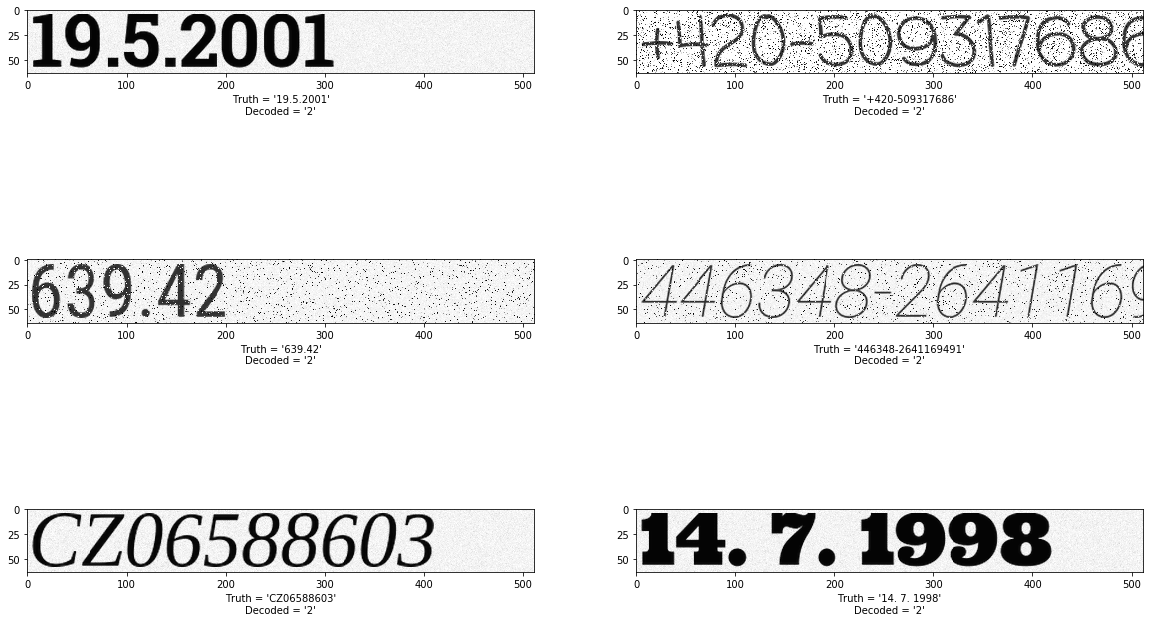

Epoch 2/5
10/10 [==============================] - 615s 61s/step - loss: 829.9988 - val_loss: 574.2096
model saved at ./pil_run/weights01.h5
 Out of 64 samples:  Mean edit distance: 31.078 Mean normalized edit distance: 6.416
 Absolute accuracy over labels is 0.00



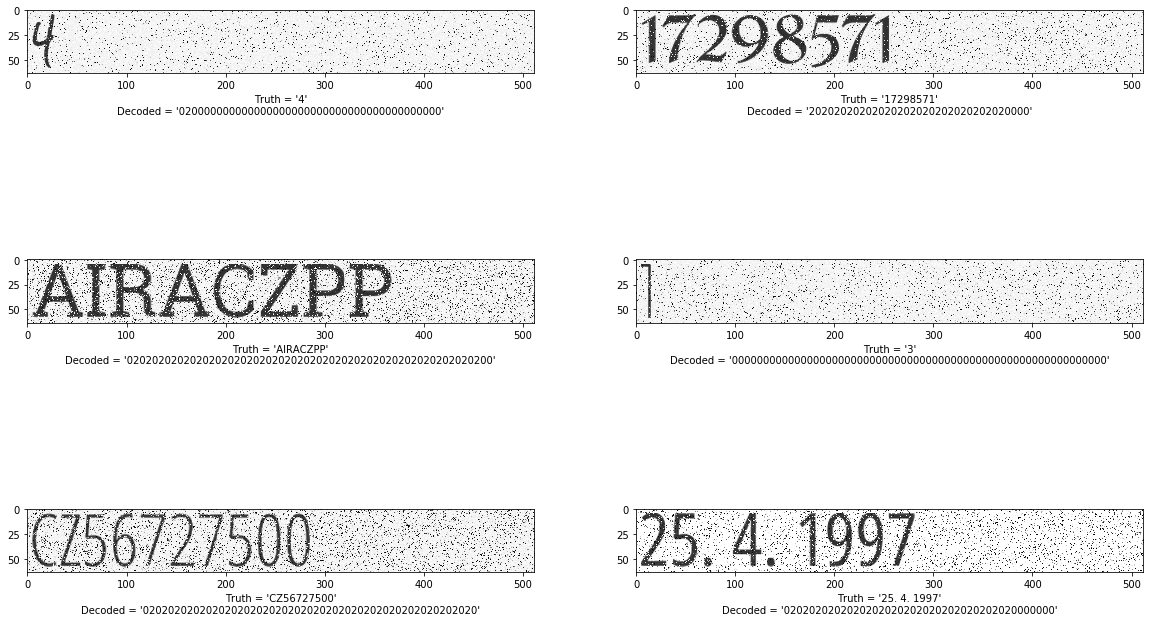

Epoch 3/5
 5/10 [==============>...............] - ETA: 2:06 - loss: 317.5150

In [0]:

ocr.train(seq, 0, 5, run_name='pil_run', verbose=1, epochlen=10, vallen=64)

# Running OCR on real images


Upload test images and test the model